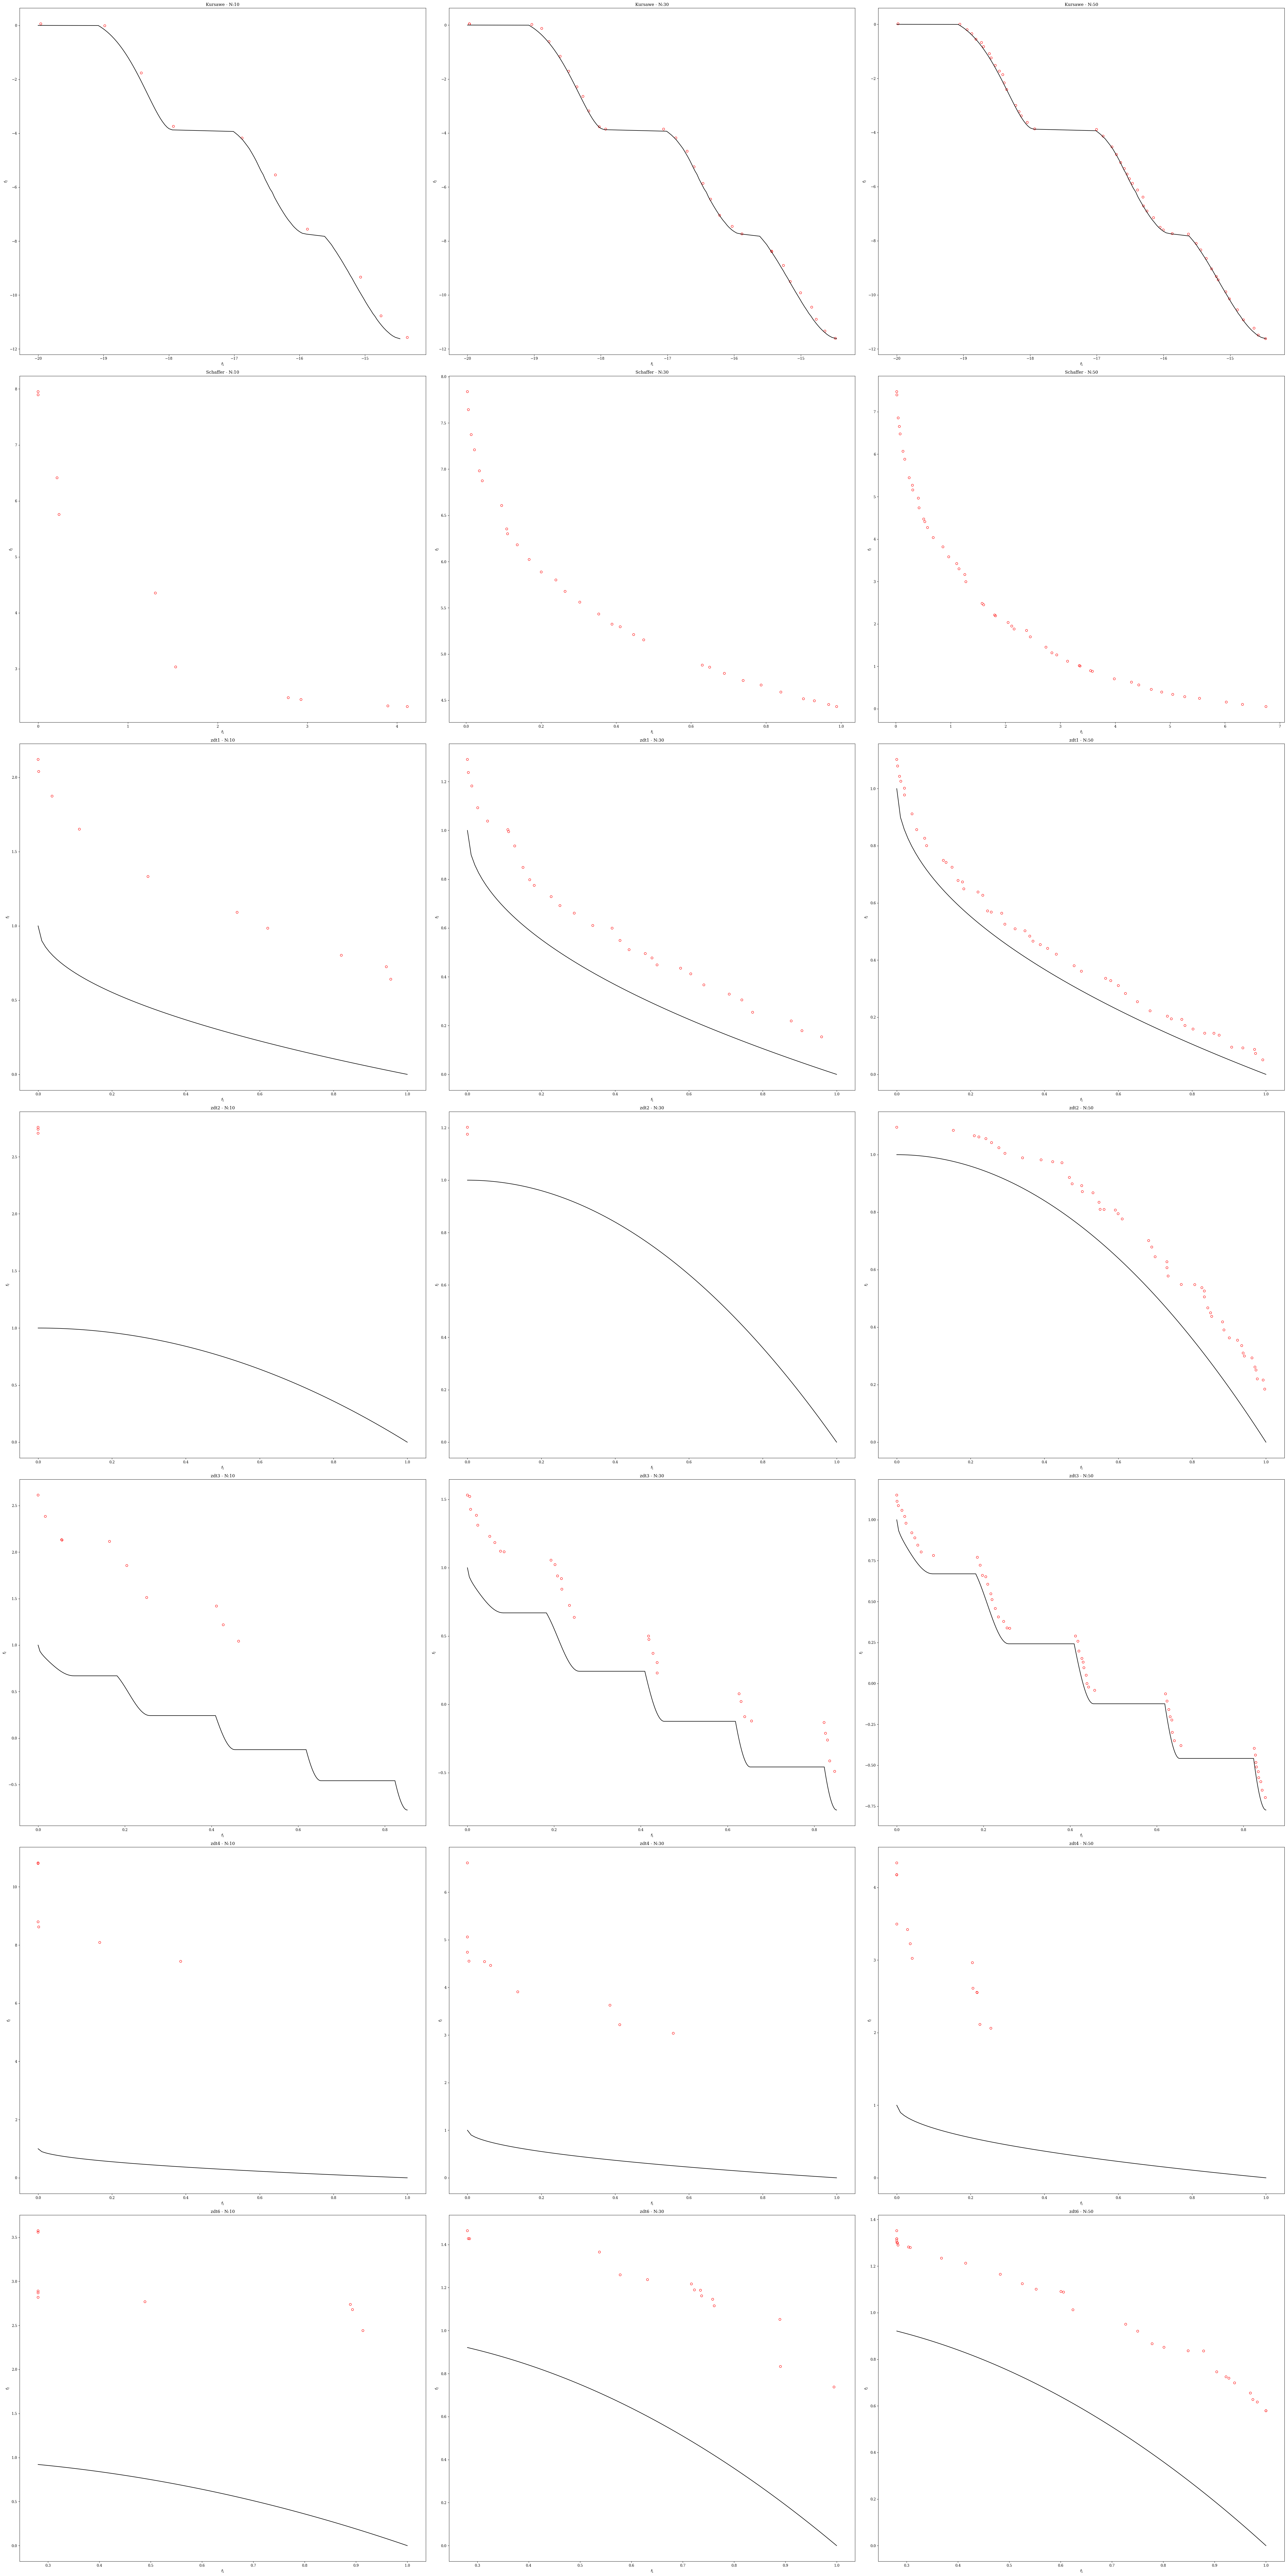

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.core.problem import Problem
from pymoo.util.remote import Remote


class Kursawe(Problem):
    def __init__(self):
        super().__init__(n_var=3, n_obj=2, n_constr=0, xl=np.array([-5, -5, -5]), xu=np.array([5, 5, 5]))

    def _evaluate(self, x, out, *args, **kwargs):
        l = []
        for i in range(2):
            l.append(-10 * np.exp(-0.2 * np.sqrt(np.square(x[:, i]) + np.square(x[:, i + 1]))))
        f1 = np.sum(np.column_stack(l), axis=1)
        f2 = np.sum(np.power(np.abs(x), 0.8) + 5 * np.sin(np.power(x, 3)), axis=1)
        out["F"] = np.column_stack([f1, f2])
        
    def _calc_pareto_front(self, *args, **kwargs):
        return Remote.get_instance().load("pymoo", "pf", "kursawe.pf")


class Schaffer(Problem):
    def __init__(self):
        super().__init__(n_var=2, n_obj=2, n_constr=0, xl=np.array([-10, -10]), xu=np.array([10**5, 10**5]))
        
    def _evaluate(self, x, out, *args, **kwargs):
        f1, f2 = [], []
        for i in range(len(x)):
            f1.append(x[i][0]**2+x[i][1]**2)
            f2.append(((x[i][1]-2)**2) +((x[i][0]-2)**2))
        out["F"] = np.column_stack([f1, f2])

class zdt1(Problem):
    def __init__(self, **kwargs):
        super().__init__(n_var=30, n_obj=2, xl=0, xu=1, vtype=float, **kwargs)
        
    def _evaluate(self, x, out, *args, **kwargs):
        f1 = x[:, 0]
        g = 1 + 9.0 / (self.n_var - 1) * np.sum(x[:, 1:], axis=1)
        f2 = g * (1 - np.power((f1 / g), 0.5))

        out["F"] = np.column_stack([f1, f2])
    
    def _calc_pareto_front(self, n_pareto_points=100):
        x = np.linspace(0, 1, n_pareto_points)
        return np.array([x, 1 - np.sqrt(x)]).T

class zdt2(Problem):
    def __init__(self, **kwargs):
        super().__init__(n_var=30, n_obj=2, xl=0, xu=1, vtype=float, **kwargs)
        
    def _evaluate(self, x, out, *args, **kwargs):
        f1 = x[:, 0]
        c = np.sum(x[:, 1:], axis=1)
        g = 1.0 + 9.0 * c / (self.n_var - 1)
        f2 = g * (1 - np.power((f1 * 1.0 / g), 2))

        out["F"] = np.column_stack([f1, f2])

    def _calc_pareto_front(self, n_pareto_points=100):
        x = np.linspace(0, 1, n_pareto_points)
        return np.array([x, 1 - np.power(x, 2)]).T

class zdt3(Problem):
    def __init__(self, **kwargs):
        super().__init__(n_var=30, n_obj=2, xl=0, xu=1, vtype=float, **kwargs)
        
    def _evaluate(self, x, out, *args, **kwargs):
        f1 = x[:, 0]
        c = np.sum(x[:, 1:], axis=1)
        g = 1.0 + 9.0 * c / (self.n_var - 1)
        f2 = g * (1 - np.power(f1 * 1.0 / g, 0.5) - (f1 * 1.0 / g) * np.sin(10 * np.pi * f1))

        out["F"] = np.column_stack([f1, f2])
    
    def _calc_pareto_front(self, n_points=100, flatten=True):
        regions = [[0, 0.0830015349],
                   [0.182228780, 0.2577623634],
                   [0.4093136748, 0.4538821041],
                   [0.6183967944, 0.6525117038],
                   [0.8233317983, 0.8518328654]]

        pf = []

        for r in regions:
            x1 = np.linspace(r[0], r[1], int(n_points / len(regions)))
            x2 = 1 - np.sqrt(x1) - x1 * np.sin(10 * np.pi * x1)
            pf.append(np.array([x1, x2]).T)

        if not flatten:
            pf = np.concatenate([pf[None,...] for pf in pf])
        else:
            pf = np.row_stack(pf)

        return pf

class zdt4(Problem):
    def __init__(self, **kwargs):
        super().__init__(n_var=10, n_obj=2, xl=0, xu=1, vtype=float, **kwargs)
        self.xl = -5 * np.ones(self.n_var)
        self.xl[0] = 0.0
        self.xu = 5 * np.ones(self.n_var)
        self.xu[0] = 1.0
        self.func = self._evaluate
        
    def _calc_pareto_front(self, n_pareto_points=100):
        x = np.linspace(0, 1, n_pareto_points)
        return np.array([x, 1 - np.sqrt(x)]).T
    
    def _evaluate(self, x, out, *args, **kwargs):
        f1 = x[:, 0]
        g = 1.0
        g += 10 * (self.n_var - 1)
        for i in range(1, self.n_var):
            g += x[:, i] * x[:, i] - 10.0 * np.cos(4.0 * np.pi * x[:, i])
        h = 1.0 - np.sqrt(f1 / g)
        f2 = g * h

        out["F"] = np.column_stack([f1, f2])

class zdt6(Problem):
    def __init__(self, **kwargs):
        super().__init__(n_var=10, n_obj=2, xl=0, xu=1, vtype=float, **kwargs)
    
    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 1 - np.exp(-4 * x[:, 0]) * np.power(np.sin(6 * np.pi * x[:, 0]), 6)
        g = 1 + 9.0 * np.power(np.sum(x[:, 1:], axis=1) / (self.n_var - 1.0), 0.25)
        f2 = g * (1 - np.power(f1 / g, 2))

        out["F"] = np.column_stack([f1, f2])
    
    def _calc_pareto_front(self, n_pareto_points=100):
        x = np.linspace(0.2807753191, 1, n_pareto_points)
        return np.array([x, 1 - np.power(x, 2)]).T

PROBLEM_CLASSES = [Kursawe(), Schaffer(), zdt1(), zdt2(), zdt3(), zdt4(), zdt6()]

fig, axs = plt.subplots(7, 3, figsize=(50, 100))
axs = axs.flatten()
counter = 0

for pr in PROBLEM_CLASSES:
    for N in [10, 30, 50]:
        problem = pr
        algortihm = NSGA2(pop_size=N)
        res = minimize(problem, algortihm, ('n_gen', 100), seed=1)

        plot = Scatter()
        plot.title = f"{problem.__class__.__name__} - N:{N}"
        plot.add(problem.pareto_front(), plot_type='line', color='black')
        plot.add(res.F, facecolor='none', edgecolor='red')
        # plot.show()
        plot.ax=axs[counter]
        plot.do()
        counter+=1
plt.tight_layout()
plt.show()
